In [1]:
!pip install -q transformers[torch]
!pip install -q sentencepiece
!pip install -q datasets
!pip install -q wordcloud
# !pip install  accelerate>=0.21.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.2 MB/s eta 0:00:00


1.	The transformers library provides mostly pre-trained transformer based models.
2.	The Torch specifies that this installation should include support for PyTorch, a popular deep learning framework.
3.	The SentencePiece is a text tokenizer designed to handle the segmentation of text into subword units.
4.	The datasets library provides an easy-to-use interface for accessing and sharing large datasets.
5.	The wordcloud library is used to generate word clouds, visual representations of text data.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

#loadin the dataset
url = "https://gitlab.com/valdanchev/data-storage-for-teaching-ml/-/raw/main/yelp_reviews_data_500.csv"
df = pd.read_csv(url)


1.	Pandas is a powerful data manipulation and analysis library for Python. It provides data structures like DataFrames, which are particularly useful for handling tabular data.
2.	Sklearn is a popular machine learning library for data mining and data analysis. The train_test_split function is used to split a dataset into training and testing sets.
3.	This line is a URL variable of a URL csv file dataset of Yelp reviews.
4.	The pd.read_csv function to read the CSV file located at the specified URL and load it into a DataFrame called df,  a 2-dimensional labeled data structure with columns of potentially different types (similar to a table in database or excel sheet).


In [3]:
df.head()

,text,label
0,"Unfortunately, the frustration of being Dr. Go...",0
1,Been going to Dr. Goldberg for over 10 years. ...,1
2,I don't know what Dr. Goldberg was like before...,0
3,I'm writing this review to give you a heads up...,0
4,All the food is great here. But the best thing...,1


returns the first 5 rows of the DataFrame, providing a quick overview of the data.

<Axes: >

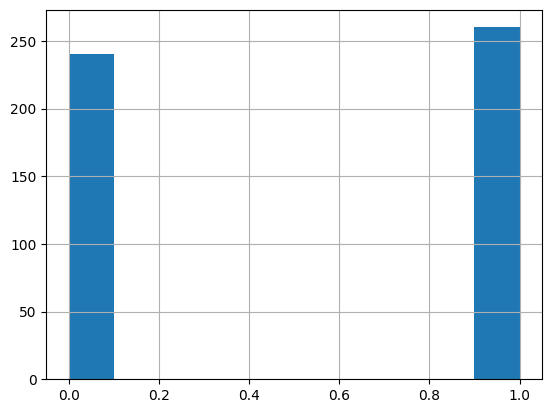

In [4]:
# histogram of labels
df.label.hist()

generate a histogram of the values in the 'label' column of the DataFrame.

In [5]:
# remove stopwords
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop = stopwords.words('english')
df['text_preprocessed'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['text_preprocessed'] = df['text_preprocessed'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


the stopwords, common words such as (The, is, and...) often removed from text data because they do not contain useful information for analysis.
Remove stopwords from the 'text' column of the DataFrame and stores the result in a new column named 'text_preprocessed'.

In [6]:
df[df['label'] == 0].to_csv('yelp_reviews_data_500_negative.csv', index=False)
df[df['label'] == 1].to_csv('yelp_reviews_data_500_positive.csv', index=False)

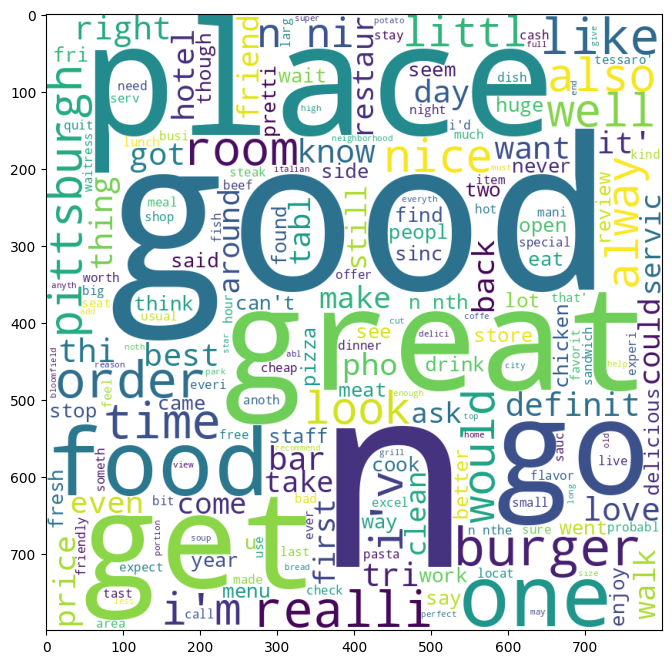

In [7]:
# plot word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# plot positive words
positive_df = pd.read_csv('yelp_reviews_data_500_positive.csv')
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop,
                min_font_size = 10).generate(' '.join(positive_df['text_preprocessed']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

1.	Matplotlib.pyplot is a library used for creating static, animated and interactive visualizations in python.
2.	A worldCloud, objected created contains parameters width and height determine the dimensions, background_color sets the background color, stopwords is a list of words to exclude from the word cloud, min_font_size sets the minimum font size for the words.

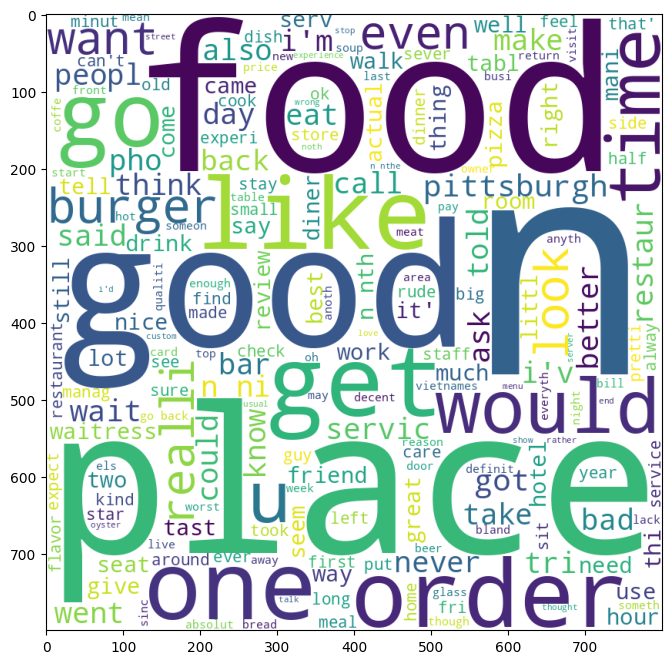

In [8]:
negative_df = pd.read_csv('yelp_reviews_data_500_negative.csv')
# plot negative words
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop,
                min_font_size = 10).generate(' '.join(negative_df['text_preprocessed']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

EDA Analysis:
* data is small, not very generalizable.
* models based on word count such as tf-idf or bag of words are gonna suffer due to overlap in words of the target sentiment in both labels.
* deep learning methods are preffered to deal with this data as they provide contextual insights.

In [9]:
df.head()

,text,label,text_preprocessed
0,"Unfortunately, the frustration of being Dr. Go...",0,"unfortunately, frustrat dr. goldberg' patient ..."
1,Been going to Dr. Goldberg for over 10 years. ...,1,been go dr. goldberg 10 years. i think i one 1...
2,I don't know what Dr. Goldberg was like before...,0,"i know dr. goldberg like move arizona, let tel..."
3,I'm writing this review to give you a heads up...,0,i'm write review give head see doctor. the off...
4,All the food is great here. But the best thing...,1,all food great here. but best thing wings. the...


In [10]:
from transformers import AutoTokenizer
import datasets

model_name = "google-bert/bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)


def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)


df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# convert df to dataset
dataset_train = datasets.Dataset.from_pandas(df_train[['text', 'label']], split='train')
dataset_test = datasets.Dataset.from_pandas(df_test[['text', 'label']], split='test')

# tokenize the dataset
dataset_train = dataset_train.map(tokenize_function, batched=True)
dataset_test = dataset_test.map(tokenize_function, batched=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

The tokenizer function takes a dictionary of examples as input, where each example contains a "text" key. It tokenizes the text using the loaded tokenizer, with options for padding to the maximum sequence length, setting the max to 128 tokens.  

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    # Calculate accuracy
    accuracy = accuracy_score(labels, preds)

   # Calculate precision, recall, and F1-score
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')
    f1 = f1_score(labels, preds, average='weighted')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


1. the accuracy is the ratio of correctly predicted instances to the total instances.
2. the precision measures the ability of a classifier not to label a negative instance as positive.
3.  the recall measures the ability of a classifier to find all positive instances.
4. the F1 score is the harmonic mean of precision and recall, providing a single metric that balances both concerns.


In [12]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

# Define your model name and number of labels
model_name = "bert-base-uncased"
num_labels = df['label'].nunique()

# Initialize the model
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./sentiment_analysis",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=5,
    weight_decay=0.01,
    evaluation_strategy='steps',
    logging_dir='./sentiment_analysis/logs',
    logging_steps=25,
    save_steps=25,
    eval_steps=25,
    load_best_model_at_end=True,
    metric_for_best_model='f1',
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_test,
    compute_metrics=compute_metrics,
)

# Start training
trainer.train()


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
25,0.708700,0.685366,0.560000,0.313600,0.560000,0.402051
50,0.710200,0.689284,0.560000,0.313600,0.560000,0.402051
75,0.721400,0.690908,0.600000,0.593651,0.600000,0.580556
100,0.695100,0.713594,0.460000,0.757551,0.460000,0.311297
125,0.712600,0.688439,0.570000,0.582316,0.570000,0.454407
150,0.684600,0.691690,0.530000,0.660235,0.530000,0.468986


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=150, training_loss=0.7054209518432617, metrics={'train_runtime': 85.538, 'train_samples_per_second': 14.029, 'train_steps_per_second': 1.754, 'total_flos': 78933316608000.0, 'train_loss': 0.7054209518432617, 'epoch': 3.0})


1.	output_dir directory where the model’s logs will be saved.
2.	num_train_epochs number of tranning epochs.
3.	per_device_train_batch_size batch size for training.
4.	per_device_eval_batch_size batch size for evaluation.
5.	warmup_steps number for learning rate scheduler.
6.	weight_decay weight decay for regularization.
7.	evaluation_strategy Specifies when to perform evaluation during training.
8.	logging_steps number of steps between logging.
9.	save_steps number of steps between model checkpoint saves.
10.	eval_steps is number of steps between evaluations.
11.	metric_for_best_model determine the best model (set to f1).
12.	Args is the training arguments.
13.	train_dataset is the training.
14.	eval_dataset is the evaluation.
15.	compute_metrics compute accuracy, precision, recall, and F1 score, during evaluation.

In [13]:
# save the model
model.config.label2id = {'negative': 0, 'positive': 1}
model.config.id2label = {0: 'negative', 1: 'positive'}

model.save_pretrained('sentiment_analysis_model')


In [14]:
# load the model
model = AutoModelForSequenceClassification.from_pretrained('sentiment_analysis_model')

In [19]:
# predict
from transformers import pipeline

classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)
print(classifier('I love you'))


[{'label': 'negative', 'score': 0.5051636695861816}]


In [20]:
print(classifier('I hate you'))


[{'label': 'positive', 'score': 0.5098667740821838}]
